In [1]:
import numpy as np
import pandas as pd
import sys
import os
code = os.path.abspath('../')
sys.path.append(code)
from src.utils import collect_region_stats_paths
import matplotlib.pyplot as plt
from src.analysis import *
from sklearn.linear_model import LinearRegression

In [2]:
base_path = '/nrs/spruston/Boaz/I2'
meta = pd.read_excel(os.path.join(code, 'logs','metadata.xlsx'), 'Metadata', index_col=0)
csv_paths = collect_region_stats_paths(base_path)
region_data = load_region_data(csv_paths)
meta

/groups/spruston/home/moharb/mambaforge/envs/pyants/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment
Number,,,,,,,,,,,,,
1,215258,549057,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-03,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,6.400000,0,Zero,Zero day iDISCO
2,216141,550749,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
3,216141,550751,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
4,216314,551089,GluA2-HaloTag line1,Skipped,JFX673,female,2024-04-02,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.400000,0,Zero,Zero day iDISCO
5,218600,555600,PSD95-HaloTag,JFX673,JF552,male,2024-06-03,2024-08-28,/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISC...,2.866667,2,Control,"Problem with Pulse, test for iDISCO"
6,215695,549895,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-15,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,6.000000,0,Zero,Zero day iDISCO
7,216141,550750,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,5.566667,0,Zero,Zero day iDISCO
8,216798,552102,GluA2-HaloTag line1,Skipped,JF552,female,2024-04-17,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.900000,0,Zero,Zero day iDISCO
9,219292,550746,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM24


In [3]:
csv_paths

{'555600': '/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISCO_EZCleat_THF/ANM555600_PSD-HT_iDISCO/itk/region_stats.csv',
 '549057': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM549057_left_JF522/itk/region_stats.csv',
 '550749': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM550749_left_JF552/itk/region_stats.csv',
 '550751': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM550751_left_JF673/itk/region_stats.csv',
 '551089': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM551089_left_JF673/itk/region_stats.csv',
 '549895': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM549895_JFX673/itk/region_stats.csv',
 '550746': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550746_BM24/itk/region_stats.csv',
 '550748': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550748_BM26/itk/region_stats.csv',
 '550750': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550750_JF552/itk/region_stats.csv',
 '552100': '/nrs/spruston/Boaz/I2/20240930

## JF552

In [4]:
columns = ['Region','mean_ch0', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JF552']   # Include only female animals
}
meta_columns = ['AnimalID']

In [5]:
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
pivoted_df = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch0', 'mean_ch1', 'mean_ch2'])


In [6]:
pivoted_df

mean_ch0                                                      \
AnimalID        549057       550749       550750       552101       552102   
Region                                                                       
1          1116.333616  1253.832042  1103.441298  1091.727964   942.746518   
2          2519.670208  2383.000455  2105.139846  1895.424370  1763.359655   
6          1717.312490  1729.956979  1452.829752  1200.542663  1067.990490   
7          1983.684201  1931.823509  1871.574677  1473.129971  1461.057958   
9          3286.437653  3406.587851  2935.273321  2510.447133  2742.807390   
...                ...          ...          ...          ...          ...   
607344850  3163.945565  2806.737785  2643.937892  2128.913399  2095.347657   
607344854  2916.047404  2561.542370  2513.940063  2196.773361  2000.561877   
607344858  3202.480195  2872.617431  2722.367300  2235.845174  2134.272495   
607344862  2868.859704  2746.645696  2311.652197  1986.646797  1967.698700   
614454277  3720.755224  3233.720911  2897.818104  2700.354887  2619.821262   

              mean_ch1                                                      \
AnimalID        549057       550749       550750       552101       552102   
Region                                                                       
1          2279.387406  2795.023871  2242.641371  2175.786512  2010.283474   
2          5025.427784  4790.441035  3836.016385  3665.589126  3498.667128   
6          1389.166736  1499.894866  1112.392149  1015.321074   921.975212   
7          1642.525250  1687.599659  1514.723751  1248.841703  1217.644446   
9          7569.492473  7722.247851  6028.361579  5916.616008  6046.612015   
...                ...          ...          ...          ...          ...   
607344850  3397.812766  3232.190742  2691.581308  2672.160486  2659.428558   
607344854  3074.644363  3080.595018  2629.566859  2799.156529  2580.021709   
607344858  3221.868882  3172.839768  2663.566772  2636.551002  2640.960074   
607344862  3282.791549  3507.310265  2493.447835  2748.584094  2710.663783   
614454277  2955.616095  2990.274910  2381.536094  2431.375475  2266.217681   

             mean_ch2                                                  
AnimalID       549057      550749      550750      552101      552102  
Region                                                                 
1          232.787874  275.582309  239.909717  235.645500  243.194362  
2          484.991755  450.442505  398.747422  388.803315  382.628757  
6          414.212005  417.642978  336.030163  315.276412  304.005713  
7          408.437068  432.210479  393.365944  357.427775  364.837554  
9          537.755472  569.783501  481.923162  480.876611  484.220054  
...               ...         ...         ...         ...         ...  
607344850  501.230174  523.758550  468.854015  437.437547  434.873340  
607344854  509.780860  534.715155  488.070163  460.260724  444.974410  
607344858  537.441746  567.544884  501.543196  470.777136  465.718091  
607344862  467.915330  522.852889  429.053476  412.095942  418.401646  
614454277  697.891527  727.520445  600.783340  556.678215  553.650598  

[687 rows x 15 columns]

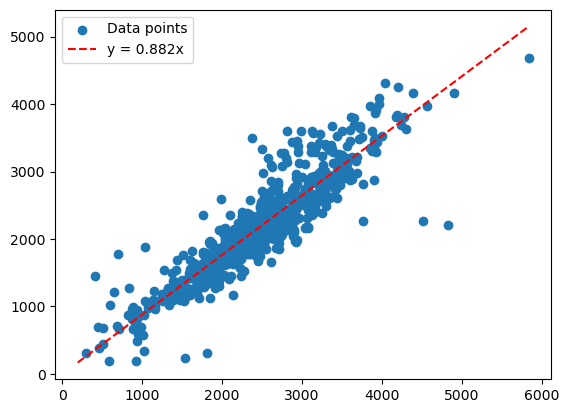

In [7]:
x = pivoted_df['mean_ch0'].iloc[:, 1]  # First column
y = pivoted_df['mean_ch0'].iloc[:, 2]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')

plt.legend()

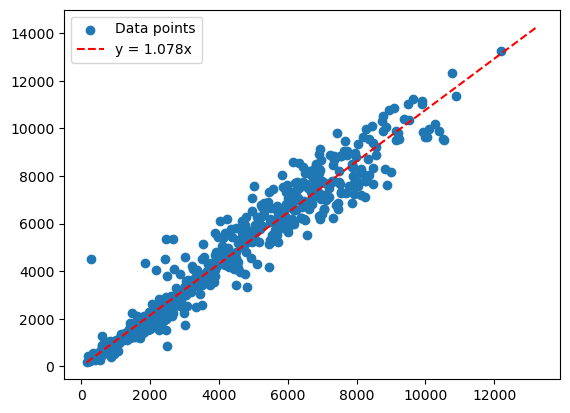

In [8]:
x = pivoted_df['mean_ch1'].iloc[:, 2]  # First column
y = pivoted_df['mean_ch1'].iloc[:, 3]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False, )
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')

plt.legend()

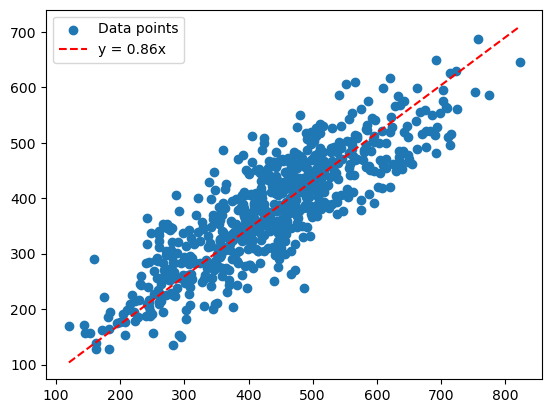

In [24]:
x = pivoted_df['mean_ch2'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch2'].iloc[:, 3]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.2f}x ')

plt.legend()

In [9]:
columns = ['Region','mean_ch0', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JFX673']   # Include only female animals
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
pivoted_df = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch0', 'mean_ch1', 'mean_ch2'])


In [10]:
pivoted_df

mean_ch0                                            mean_ch1  \
AnimalID        549895       550751       551089       552100       549895   
Region                                                                       
1          1144.833302  1155.406370  1324.646365  1076.610910   519.898850   
2          1978.602552  2744.493007  2567.491361  1562.799937   913.178655   
6          1400.746080  1730.547965  1718.541011  1033.610104   757.396063   
7          1541.137343  2178.797750  1964.218663  1143.180452   778.301006   
9          2846.659554  3632.802899  3780.560226  2610.326449  1163.247113   
...                ...          ...          ...          ...          ...   
607344850  2062.953959  2467.225288  2817.898146  2116.756577  1020.797043   
607344854  1975.865967  2517.594442  2586.329785  1850.917410   986.535973   
607344858  2138.080643  2723.735232  2896.772416  2143.793697  1072.590058   
607344862  1897.924085  2449.965870  2470.179721  2039.247248   935.496907   
614454277  2533.512348  3346.935648  3515.349758  2293.726586  1254.998290   

                                                     mean_ch2               \
AnimalID        550751       551089       552100       549895       550751   
Region                                                                       
1           553.785722   605.867599   504.976818  1724.940704  1924.899627   
2          1451.644651  1303.450925   776.315945  2107.238101  2639.169324   
6          1104.980058  1051.323832   572.982265   604.016429   731.109178   
7          1138.159519   956.860366   631.988386   787.618077   994.455866   
9          1774.924450  1695.795463  1196.611629  3360.983813  4602.336943   
...                ...          ...          ...          ...          ...   
607344850  1330.046793  1574.744769  1123.550269  1516.361156  1731.305437   
607344854  1455.369900  1450.364657   971.429418  1392.886890  1814.169795   
607344858  1547.396361  1638.306540  1161.919752  1444.253613  1785.732358   
607344862  1350.546451  1396.931949  1099.128814  1420.265283  1901.461518   
614454277  1983.966090  1921.755818  1108.932798  1137.397488  1519.447022   

                                     
AnimalID        551089       552100  
Region                               
1          2111.123160  1823.251490  
2          2625.309118  2099.602412  
6           795.724093   586.134448  
7          1019.655073   761.903321  
9          4811.012262  3726.198028  
...                ...          ...  
607344850  2013.368861  1860.911206  
607344854  1954.806922  1706.401101  
607344858  2002.959731  1762.601371  
607344862  1909.728950  1864.739121  
614454277  1633.200798  1268.581758  

[687 rows x 12 columns]

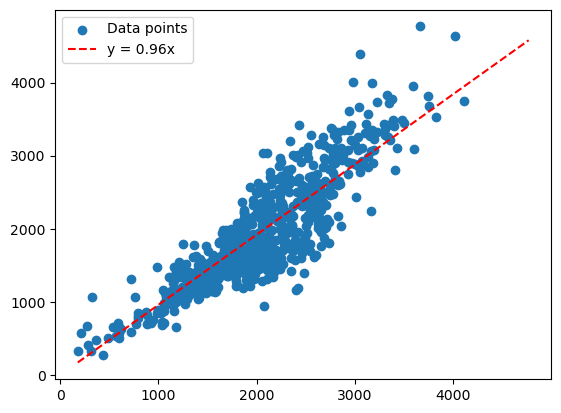

In [13]:
x = pivoted_df['mean_ch0'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch0'].iloc[:, 3]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.2f}x ')

plt.legend()

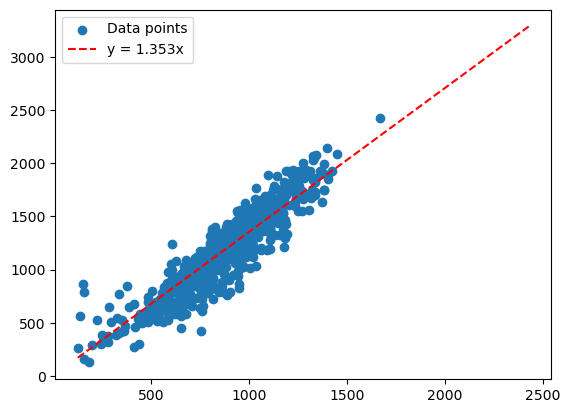

In [14]:
x = pivoted_df['mean_ch1'].iloc[:, 0]  # First column
y = pivoted_df['mean_ch1'].iloc[:, 2]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')

plt.legend()

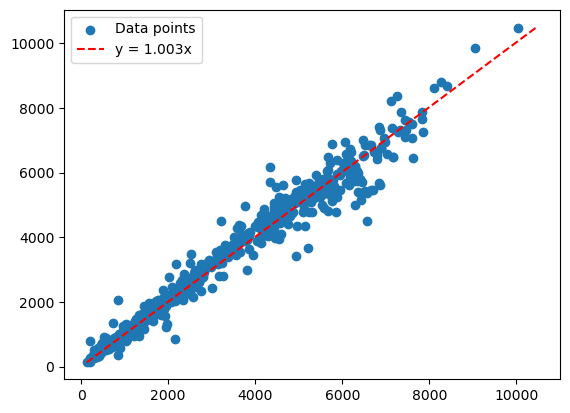

In [33]:
x = pivoted_df['mean_ch2'].iloc[:, 1]  # First column
y = pivoted_df['mean_ch2'].iloc[:, 2]  # Second column
min_val = min(x.min(), y.min())
max_val = max(x.max(), y.max())
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=False)
model.fit(x.values.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')
plt.box('off')
plt.legend()

# 

In [26]:
columns = ['Region','mean_ch0', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JFX673']   # Include only female animals
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
JFX673 = unified_df.groupby(by='Region')['mean_ch2'].median()
JFX673

Region
1            1874.075558
2            2366.273610
6             667.562804
7             891.036971
9            4164.267486
                ...     
607344850    1796.108322
607344854    1760.285448
607344858    1774.166864
607344862    1883.100320
614454277    1394.014390
Name: mean_ch2, Length: 687, dtype: float64

In [27]:
columns = ['Region','mean_ch0', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JFX673']   # Include only female animals
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
JF552 = unified_df.groupby(by='Region')['mean_ch1'].median()
JF552

Region
1             536.842286
2            1108.314790
6             904.359948
7             867.580686
9            1446.203546
                ...     
607344850    1226.798531
607344854    1218.450315
607344858    1354.658056
607344862    1224.837632
614454277    1588.377054
Name: mean_ch1, Length: 687, dtype: float64

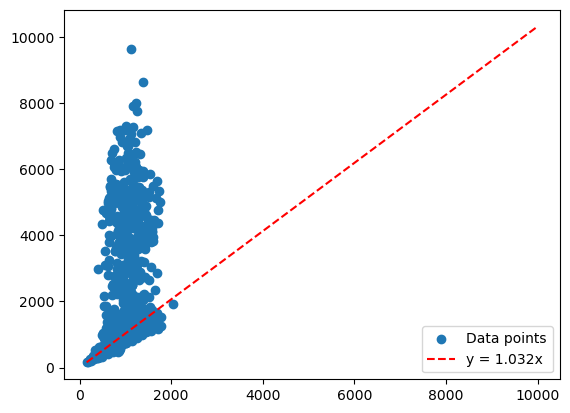

In [30]:
x = JF552.values
y = JFX673.values
min_val = min(x.min(), y.min())
max_val = 10000
line = np.linspace(min_val, max_val, 100)
model = LinearRegression(fit_intercept=True)
model.fit(x.reshape(-1, 1), y)
a = model.coef_[0]
fitted_line = a * line
# Scatter plot
plt.scatter(x, y, label='Data points')
plt.plot(line, fitted_line, 'r--', label=f'y = {a:.3f}x ')
plt.box('off')
plt.legend()